In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [52]:
df = pd.read_pickle("./sample.pkl").sort_values(by=["EPOCH"])
df['EPOCH'] = df['EPOCH'].astype('datetime64[ns]')

In [53]:
columns = [
    "EPOCH","INCLINATION","ECCENTRICITY","MEAN_MOTION",
]

In [54]:
df[columns].describe()

,INCLINATION,ECCENTRICITY,MEAN_MOTION
count,40175.000000,40175.000000,40175.000000
mean,90.269898,0.003834,14.498313
std,12.103713,0.003713,0.404971
min,40.930000,0.000206,13.998026
25%,82.554300,0.002165,14.029986
50%,98.478400,0.003765,14.717930
75%,98.886400,0.004158,14.818136
max,99.260300,0.053996,16.330104


12223
15923
[-2.27522292 -1.12207432 -1.05314729 ... -0.95960961 -1.9064039
 -1.9064039 ]


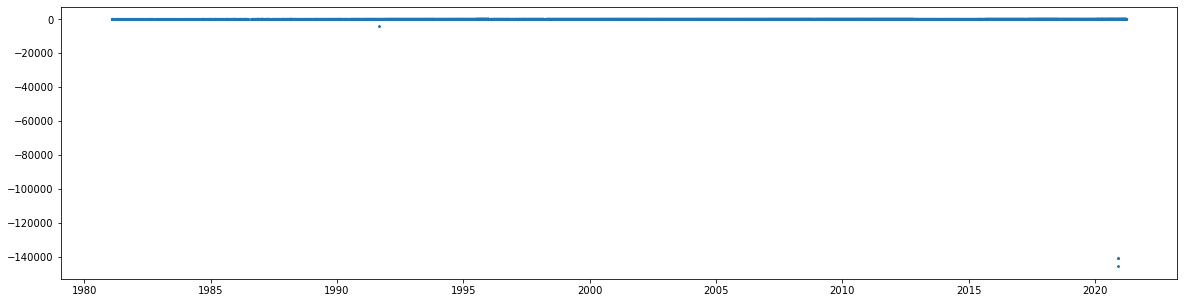

16720
16360
[-1.04104559 -1.07589331 -0.9647467  ... -0.92646645 -1.17242516
 -0.92646645]


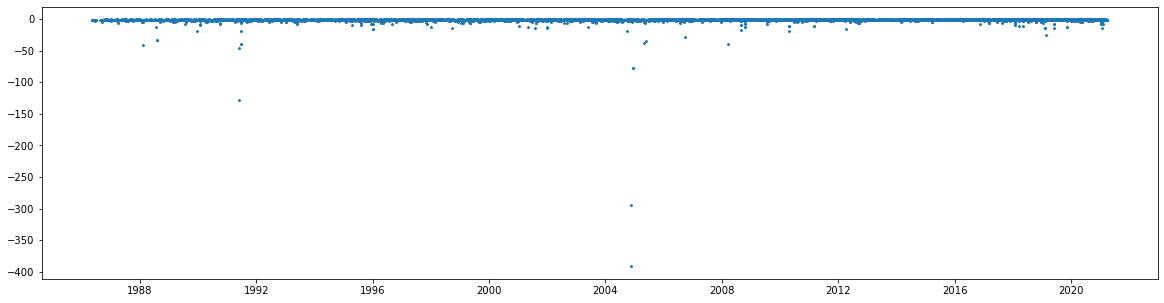

25988
1342
[-2.33174525 -2.40953093 -1.22855802 ... -1.02460179 -0.98799446
 -1.40032829]


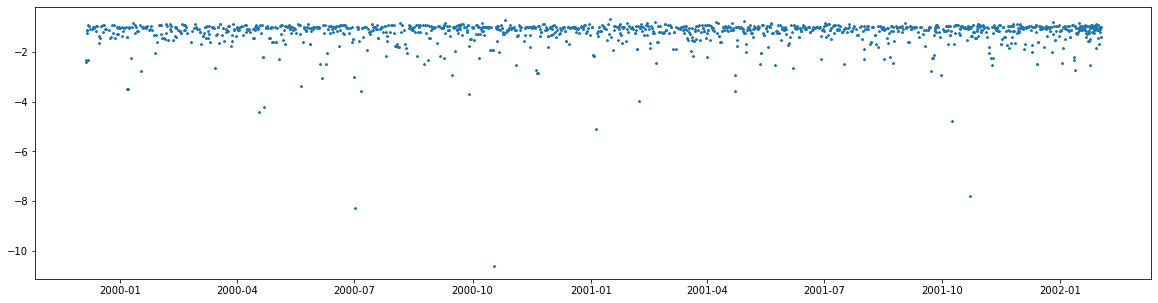

26285
6550
[-1.40036638 -1.13783213 -1.13783213 ... -1.3076576  -1.92755355
 -1.92755355]


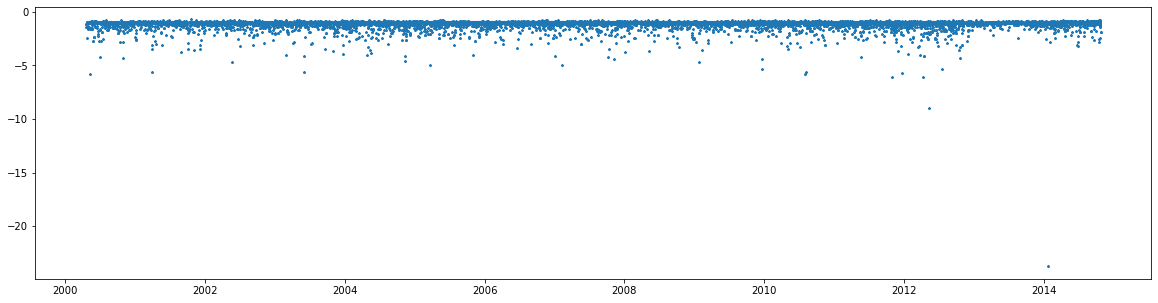

In [62]:
for norad_id, df1 in df.groupby("NORAD_CAT_ID"):
    df2 = df1[columns].copy()
    df2["EPOCH"] = df2["EPOCH"].astype(int)/ 10**9
    print(norad_id)
#     display(df1)
#     display(df1.values)
    clf = LocalOutlierFactor(n_neighbors=2)
    
    scaler = MinMaxScaler()
    data = scaler.fit_transform(df2.values)
    clf.fit_predict(data)
    print(len(clf.negative_outlier_factor_))
    print(clf.negative_outlier_factor_)
    plt.figure(figsize = (20,5))
    ax = plt.scatter(df1.EPOCH,clf.negative_outlier_factor_, marker="*", s=5, alpha=1)
    plt.show()

# What to do next:

* identify columns to check
* check if time interval matters
* scaling
* break up detection on per column
* find threshold
* incorporate into nick's pipeline